# Exercice: empreinte environnementale du Luxembourg
Nous nous penchons ici sur le calcul de l'empreinte environnementale du Luxembourg, c'est-à-dire l'ensemble des impacts environnementaux liés à la consommation finale du pays.

Points d'attention de ce notebook
- carbone
- eau
- occupation des sols
- énergie primaire

Nous nous focalisersons sur la comparison entre empreinte territoriale et consommation.


In [1]:
import pymrio as mr   # manipulation des données input-output
import pandas as pd   # manipulation de tables et jeux de données
import numpy as np    # opérations communes
import seaborn as sns # production de figures, add-on à matplotlib
import matplotlib.pyplot as plt # production de figures
import os # opérations sur le système de fichiers

In [2]:
# Si vous voulez enregistrer/charger rapidement
import pickle

In [3]:
year = 2019
EXIOBASE_PATH = '../EXIOBASE/' # ne pas hésiter à changer

In [4]:
# Chargement rapide des données IO
with open(EXIOBASE_PATH + f'IOT_{year}_ixi.pickle', 'rb') as handle:
    io = pickle.load(handle)

## Rapports environnementaux

Lors du premier calcul, les rapports environnementaux sont générés automatiquement, ils se composent de:
- `D_pba`: impacts directs annuels, (pba = production-based accounts) strictement équivalente à `F`,
- `D_cba`: empreintes annuelles, (cba = consumption-based accounts),
- `D_imp`: impacts liés aux importations,
- `D_exp`: impacts liés aux exportations,

Par définition, $$D_{cba} = D_{pba} + D_{imp} - D_{exp}$$

Ces rapports existent en différentes agrégations:
- `D_pba_reg` et `D_cba_reg`: impacts totaux par région,
- `D_pba_cap` et `D_cba_cap`: impacts per capita.

In [41]:
# Ne gardons que les indicateurs qui nous intéressent
indicateurs = [
    'GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)',
    'Water Consumption Blue - Total',
    'Unused Domestic Extraction - Oil and Gas',
    'Domestic Extraction Used - Non-metalic Minerals',
    'Domestic Extraction Used - Iron Ore',
    'Domestic Extraction Used - Non-ferous metal ores'
]

In [42]:
# Quelles sont les unités des différents indicateurs? 
io.impacts.unit.loc[indicateurs]

,unit
impact,
"GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)",kg CO2 eq.
Water Consumption Blue - Total,Mm3
Unused Domestic Extraction - Oil and Gas,kt
Domestic Extraction Used - Non-metalic Minerals,kt
Domestic Extraction Used - Iron Ore,kt
Domestic Extraction Used - Non-ferous metal ores,kt


In [7]:
io.impacts.D_pba_reg.loc[indicateurs, 'LU']

impact
GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)    1.171279e+10
Water Consumption Blue - Total                                                                    1.189350e+01
Unused Domestic Extraction - Oil and Gas                                                          0.000000e+00
Unused Domestic Extraction - Non-metalic Minerals                                                 1.390043e+02
Unused Domestic Extraction - Iron Ore                                                             0.000000e+00
Unused Domestic Extraction - Non-ferous metal ores                                                0.000000e+00
Name: LU, dtype: float64

In [8]:
# Curieux qu'il y ait de l'extraction de "minéraux" au Luxembourg, allons voir
minerals = [s for s in io.satellite.unit.index if 'Non-Metallic Minerals' in s]

In [38]:
[s for s in io.impacts.unit.index if 'Domestic' in s]

['Unused Domestic Extraction',
 'Water Consumption Blue - Domestic',
 'Water Withdrawal Blue - Domestic',
 'Domestic Extraction Used - Crop and Crop Residue',
 'Domestic Extraction Used - Grazing and Fodder',
 'Domestic Extraction Used - Forestry and Timber',
 'Domestic Extraction Used â\x80\x93 Fisheries',
 'Domestic Extraction Used - Non-metalic Minerals',
 'Domestic Extraction Used - Iron Ore',
 'Domestic Extraction Used - Non-ferous metal ores',
 'Unused Domestic Extraction - Crop and Crop Residue',
 'Unused Domestic Extraction - Grazing and Fodder',
 'Unused Domestic Extraction - Forestry and Timber',
 'Unused Domestic Extraction â\x80\x93 Fisheries',
 'Unused Domestic Extraction - Coal and Peat',
 'Unused Domestic Extraction - Oil and Gas',
 'Unused Domestic Extraction - Non-metalic Minerals',
 'Unused Domestic Extraction - Iron Ore',
 'Unused Domestic Extraction - Non-ferous metal ores']

In [9]:
# Nous pouvons utiliser les comptes "satellite" (plutôt que "impacts") pour l'information désagrégée
io.satellite.D_pba_reg.loc[minerals, 'LU']

stressor
Domestic Extraction Used - Non-Metallic Minerals - Building stones                           0.000000
Domestic Extraction Used - Non-Metallic Minerals - Chemical and fertilizer minerals          0.000000
Domestic Extraction Used - Non-Metallic Minerals - Clays and kaolin                          0.000000
Domestic Extraction Used - Non-Metallic Minerals - Gravel and sand                           0.000000
Domestic Extraction Used - Non-Metallic Minerals - Limestone, gypsum, chalk, dolomite        0.000000
Domestic Extraction Used - Non-Metallic Minerals - Other minerals                          992.887857
Domestic Extraction Used - Non-Metallic Minerals - Salt                                      0.000000
Domestic Extraction Used - Non-Metallic Minerals - Slate                                     0.000000
Unused Domestic Extraction - Non-Metallic Minerals - Building stones                         0.000000
Unused Domestic Extraction - Non-Metallic Minerals - Chemical and fertili

In [10]:
# La catégorie est "Other minerals"
other_minerals = [s for s in io.satellite.unit.index if 'Other minerals' in s]

io.satellite.D_pba.loc[other_minerals, 'LU'].T.nlargest(n=5,columns=[other_minerals[0]])

stressor,Domestic Extraction Used - Non-Metallic Minerals - Other minerals,Unused Domestic Extraction - Non-Metallic Minerals - Other minerals
sector,,
Quarrying of sand and clay,992.887857,139.0043
Cultivation of paddy rice,0.000000,0.0000
Cultivation of wheat,0.000000,0.0000
Cultivation of cereal grains nec,0.000000,0.0000
"Cultivation of vegetables, fruit, nuts",0.000000,0.0000


In [11]:
# En consommation, il est en revanche normal d'avoir une empreinte-matériau non-nulle
io.impacts.D_cba_reg.loc[indicateurs, 'LU']

impact
GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)    1.824136e+10
Water Consumption Blue - Total                                                                    9.045988e+02
Unused Domestic Extraction - Oil and Gas                                                          7.172791e+02
Unused Domestic Extraction - Non-metalic Minerals                                                 2.722234e+03
Unused Domestic Extraction - Iron Ore                                                             7.864774e+02
Unused Domestic Extraction - Non-ferous metal ores                                                4.877768e+03
Name: LU, dtype: float64

[Text(0, 0, 'GHG emissions (GWP100)\nProblem oriented approach: baseline (CML, 2001)\nGWP100 (IPCC, 2007)\n[1000000 kg CO2 eq.]'),
 Text(0, 1, 'Water Consumption Blue\nTotal\n[1 Mm3]'),
 Text(0, 2, 'Unused Domestic Extraction\nOil and Gas\n[1 kt]'),
 Text(0, 3, 'Unused Domestic Extraction\nNon-metalic Minerals\n[1 kt]'),
 Text(0, 4, 'Unused Domestic Extraction\nIron Ore\n[1 kt]'),
 Text(0, 5, 'Unused Domestic Extraction\nNon-ferous metal ores\n[1 kt]')]

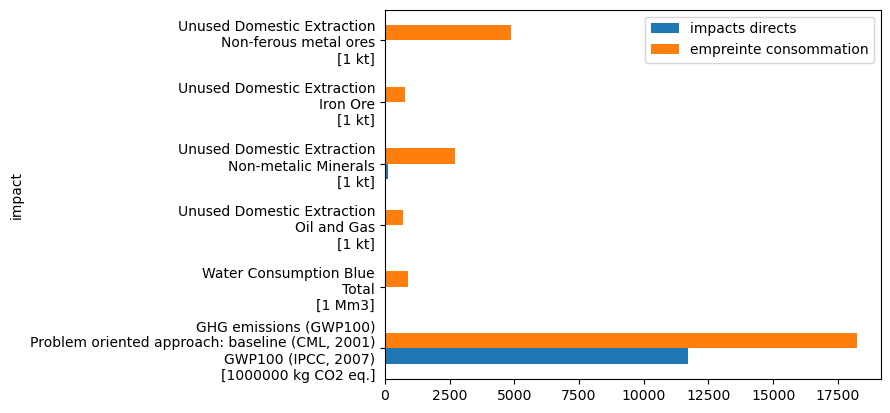

In [12]:
scale = pd.Series([1e6,1,1,1,1,1], index=indicateurs)
units = [f'{u[0]} [{s:.0f} {u[1]}]' for u,s in zip(io.impacts.unit.loc[indicateurs,'unit'].items(), scale)]
units = [u.replace(' - ','\n').replace(' | ','\n').replace(' [','\n[') for u in units]

empreinte_LU = pd.concat([
    io.impacts.D_pba_reg.loc[indicateurs, 'LU'],
    io.impacts.D_cba_reg.loc[indicateurs, 'LU'],
], axis=1, keys=['impacts directs', 'empreinte consommation']).div(scale, axis=0)

ax = empreinte_LU.plot.barh()
ax.set_yticklabels(units)

## Comparaison extraction domestique/empreinte pour différents minerais

C:\Users\Gibon\AppData\Local\Temp\ipykernel_31996\1516201404.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empreinte_LU_formatted = empreinte_LU.applymap(lambda x: f'{x:.0f}')


<Axes: ylabel='stressor'>

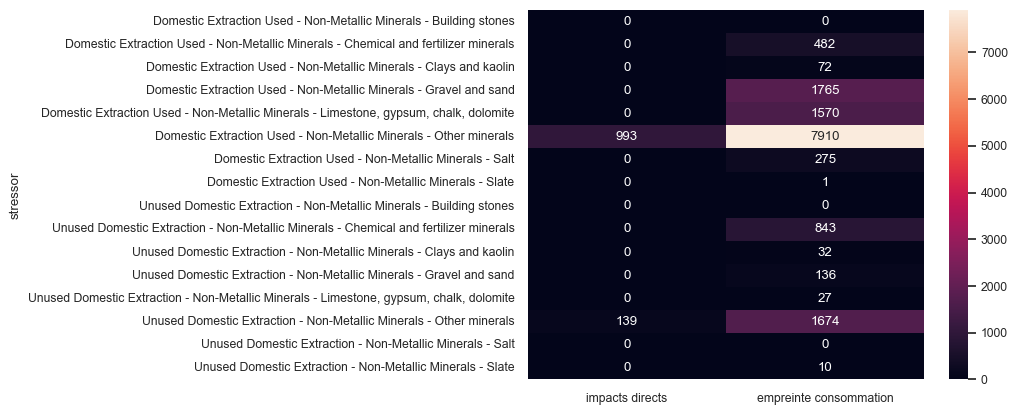

In [13]:
sns.set(font_scale=.8)

scale = pd.Series([1]*16, index=minerals)
units = [f'{u[0]} [{s:.0f} {u[1]}]' for u,s in zip(io.satellite.unit.loc[minerals,'unit'].items(), scale)]
units = [u.replace(' - ','\n').replace(' | ','\n').replace(' [','\n[') for u in units]

empreinte_LU = pd.concat([
    io.satellite.D_pba_reg.loc[minerals, 'LU'],
    io.satellite.D_cba_reg.loc[minerals, 'LU'],
], axis=1, keys=['impacts directs', 'empreinte consommation']).div(scale, axis=0)

# ax = empreinte_LU.plot.barh()
# ax.set_yticklabels(units)
empreinte_LU_formatted = empreinte_LU.applymap(lambda x: f'{x:.0f}')
sns.heatmap(empreinte_LU, annot=empreinte_LU_formatted, fmt='')

## Comparaison avec d'autres pays

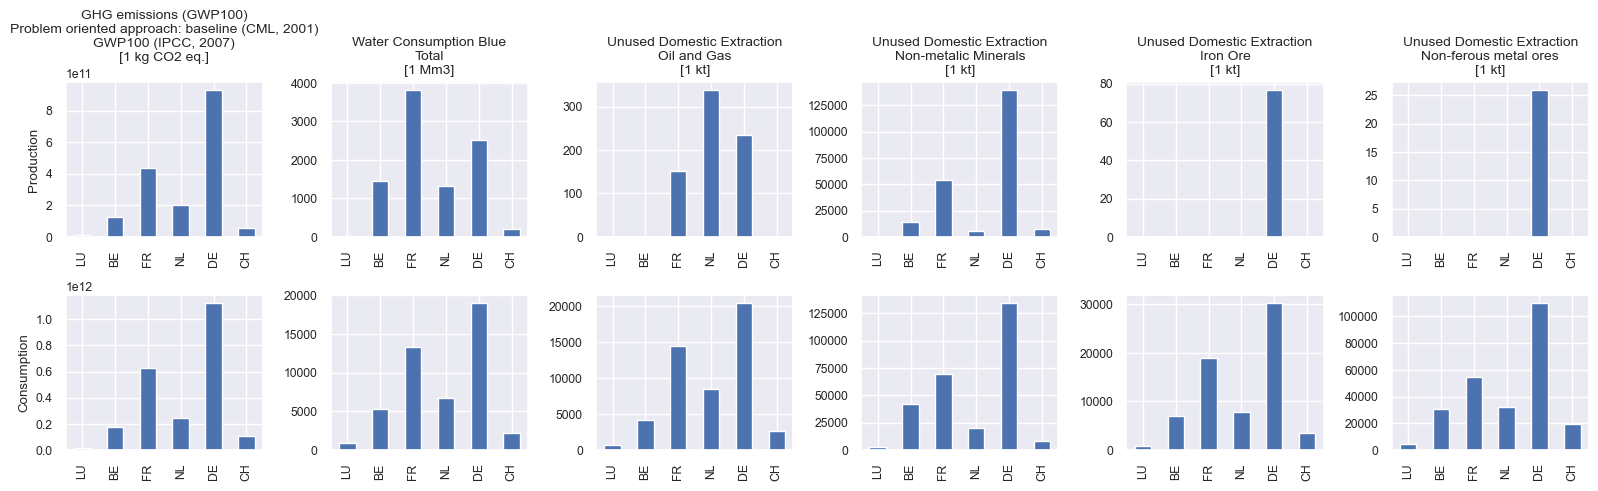

In [14]:
sns.set(font_scale=.8)

scale = pd.Series([1,1,1,1,1,1], index=indicateurs)
units = [f'{u[0]} [{s:g} {u[1]}]' for u,s in zip(io.impacts.unit.loc[indicateurs,'unit'].items(), scale)]
units = [u.replace(' - ','\n').replace(' | ','\n').replace(' [','\n[') for u in units]

pays = ['LU', 'BE', 'FR', 'NL', 'DE', 'CH']

fig, ax = plt.subplots(2,len(indicateurs), figsize=(16,5))

for i, indicateur in enumerate(indicateurs):
    io.impacts.D_pba_reg.div(scale, axis=0).loc[indicateur, pays].plot.bar(ax=ax[0,i])
    ax[0,i].set_title(units[i], fontsize=10)
    io.impacts.D_cba_reg.div(scale, axis=0).loc[indicateur, pays].plot.bar(ax=ax[1,i])
    
ax[0,0].set_ylabel('Production')
ax[1,0].set_ylabel('Consumption')
plt.tight_layout()

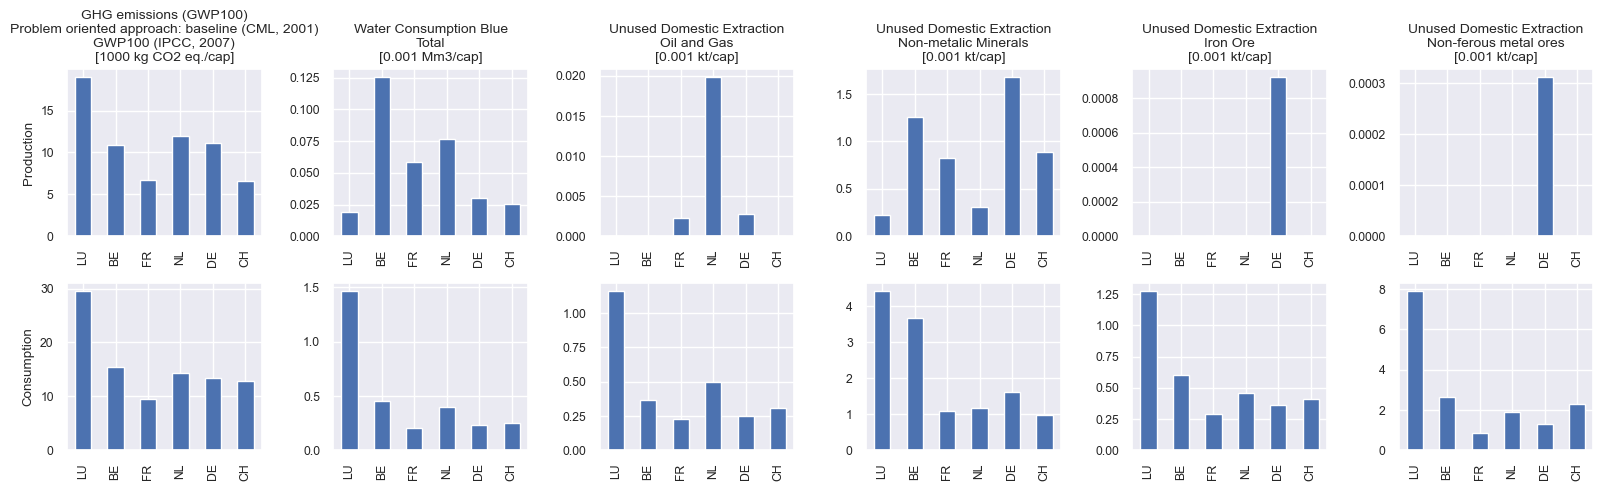

In [15]:
# Bien sûr, il serait plus pertinent de comparer les empreintes par personne

scale = pd.Series([1e3,1e-3,1e-3,1e-3,1e-3,1e-3], index=indicateurs)
units = [f'{u[0]} [{s:g} {u[1]}/cap]' for u,s in zip(io.impacts.unit.loc[indicateurs,'unit'].items(), scale)]
units = [u.replace(' - ','\n').replace(' | ','\n').replace(' [','\n[') for u in units]

fig, ax = plt.subplots(2,len(indicateurs), figsize=(16,5))

for i, indicateur in enumerate(indicateurs):
    
    io.impacts.D_pba_cap.div(scale, axis=0).loc[indicateur, pays].plot.bar(ax=ax[0,i])
    ax[0,i].set_title(units[i], fontsize = 10)
    io.impacts.D_cba_cap.div(scale, axis=0).loc[indicateur, pays].plot.bar(ax=ax[1,i])

ax[0,0].set_ylabel('Production')
ax[1,0].set_ylabel('Consumption')
plt.tight_layout()

## Retracer l'origine d'une empreinte
La question typique est "Mais pourquoi le pays X consomme-t-il autant de ressource Y ?".

La formule pour le calcul qui nous intéresse est $$GHG_{cons pro LU}=\widehat{S_{GWP100}}L\widehat{y_{LU}}$$

In [16]:
# Isolons la demande du Luxembourg
Y_LU = io.Y['LU'].sum(1)

In [17]:
## Intéressons-nous d'abord aux émissions de GES
ind = 'GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)'

# Déterminons le "parcours" des impacts à travers les transactions
GHG_cons_pro_LU = io.L.multiply(io.impacts.S.loc[ind],axis=0).multiply(Y_LU)

In [18]:
# Calcul des impacts directs (des ménages/de l'administration)
GHG_cons_pro_LU_Y = io.impacts.F_Y.loc[ind,'LU']

In [19]:
# Vérifions que le total...
GHG_cons_pro_LU.sum().sum() + GHG_cons_pro_LU_Y.sum()

18241355381.66245

In [20]:
# ...correspond bien aux rapports "consumption-based"
io.impacts.D_cba_reg.loc[ind,'LU']

18241355381.7

In [21]:
GHG_cons_pro_LU_reg = GHG_cons_pro_LU.groupby('region').sum().groupby('region', axis=1).sum()

C:\Users\Gibon\AppData\Local\Temp\ipykernel_31996\1087685652.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  GHG_cons_pro_LU_reg = GHG_cons_pro_LU.groupby('region').sum().groupby('region', axis=1).sum()


<Axes: xlabel='region', ylabel='region'>

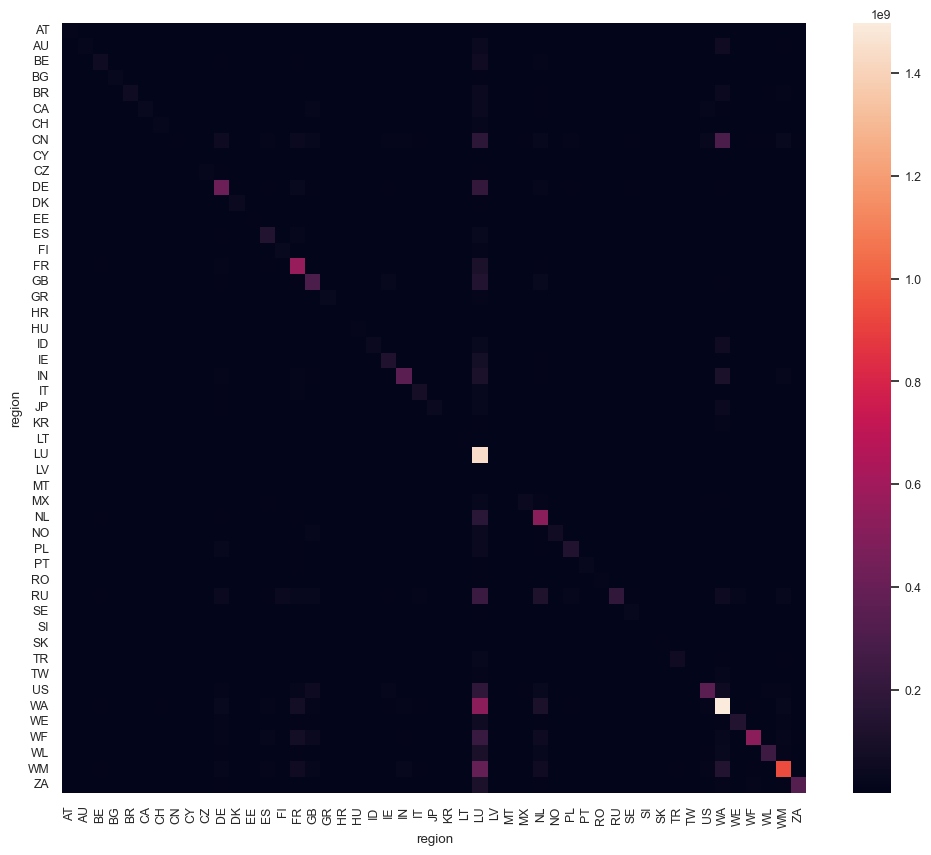

In [22]:
fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(GHG_cons_pro_LU_reg, ax=ax)

Une telle matrice reste difficile à lire, nous allons voir comment l'agréger dans le notebook suivant.

<Axes: xlabel='region', ylabel='region'>

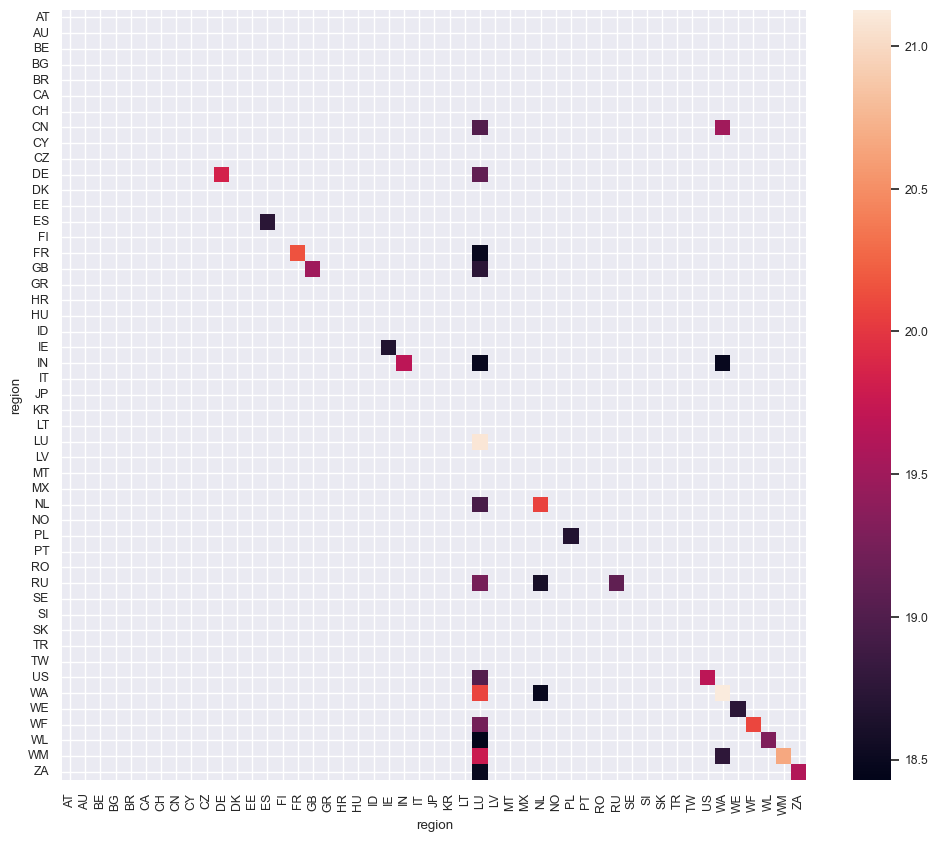

In [23]:
fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(np.log(GHG_cons_pro_LU_reg[GHG_cons_pro_LU_reg>1e8]), ax=ax)

In [24]:
GHG_cons_pro_LU.loc[:,('TOTAL','TOTAL')] = GHG_cons_pro_LU.sum(1)
GHG_cons_pro_LU.loc[('TOTAL','TOTAL'),:] = GHG_cons_pro_LU.sum(0)

Affichons maintenant un résumé des échanges internationaux liés à la demande du Luxembourg les plus élevés. 

Ces échanges peuvent prendre place entre n'importe quel couple région 1-région 2, pas nécessairement au Luxembourg.

C:\Users\Gibon\AppData\Local\Temp\ipykernel_31996\4218654474.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  GHG_snap = GHG_cons_pro_LU.sort_values(('TOTAL','TOTAL'),axis=1,ascending=False).sort_values(('TOTAL','TOTAL'),ascending=False).iloc[:50,:20].drop('TOTAL').drop('TOTAL',axis=1)*1e-6


<Axes: xlabel='region-sector', ylabel='region-sector'>

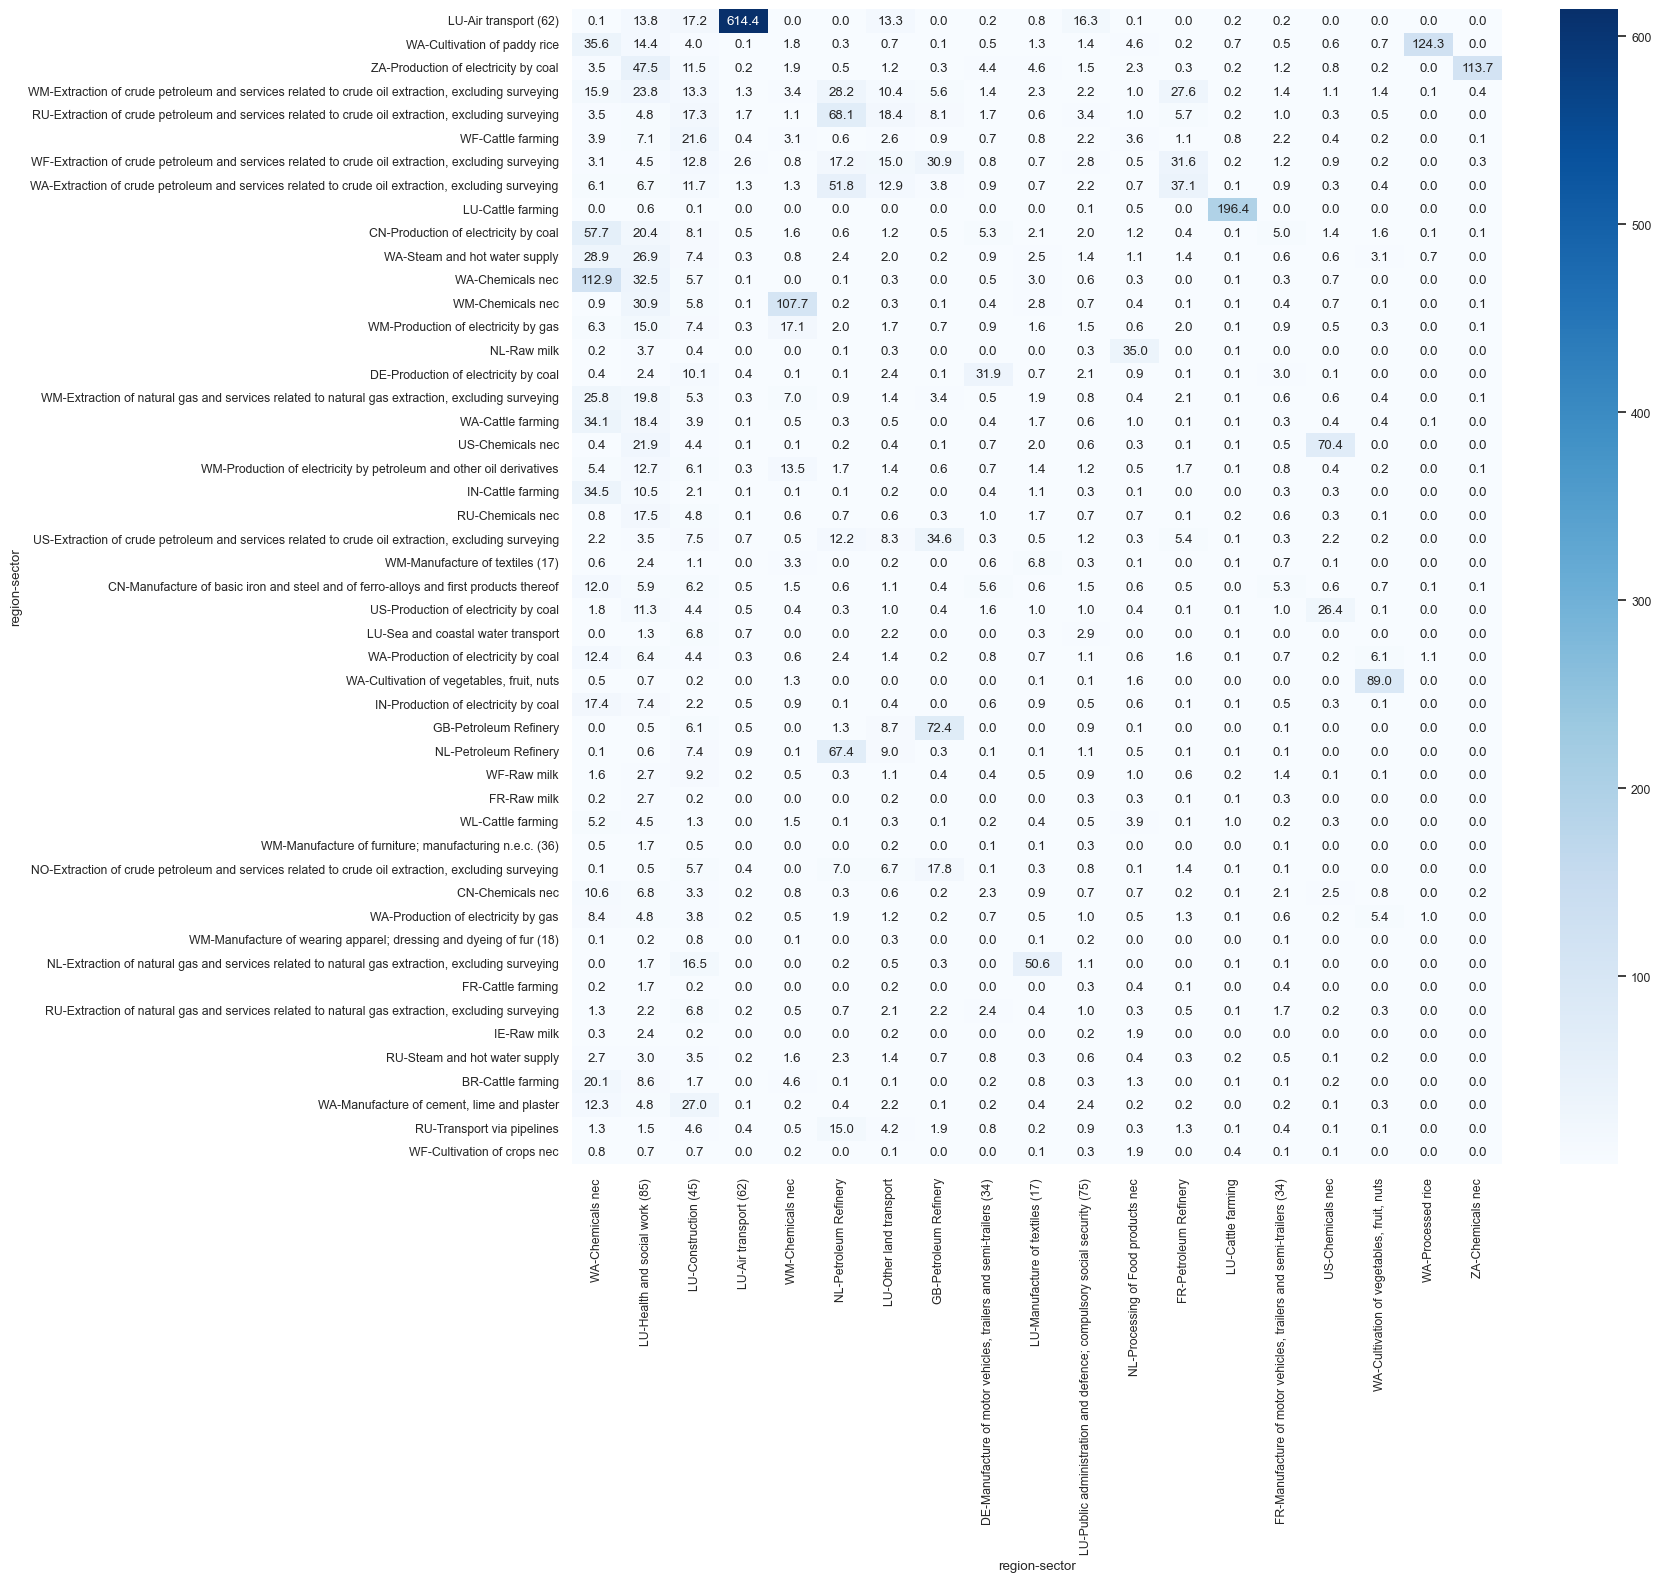

In [25]:
GHG_snap = GHG_cons_pro_LU.sort_values(('TOTAL','TOTAL'),axis=1,ascending=False).sort_values(('TOTAL','TOTAL'),ascending=False).iloc[:50,:20].drop('TOTAL').drop('TOTAL',axis=1)*1e-6
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(GHG_snap, annot=True,
#             norm=matplotlib.colors.LogNorm(vmin=1e-6,
#                                            vmax=GHG_snap.max().max()),
            cmap='Blues', fmt='.1f')